# Hi!
# This is my simple-test GradientBoostingClassifier from sklearn

## About DataSet from UCI-site:

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

## About variables

I realy don't know, what is what there
Go just make a simple GBC-test

## Download DataSet

[LINK](https://archive.ics.uci.edu/ml/datasets/Ionosphere)


## Import modules and prepeare data

In [169]:
# ==============
# IMPORT MODULES
# ==============

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
# =========
# READ DATA
# =========

data = pd.read_csv('ionosphere.data', header=None)

### Go see head of data

In [181]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


### There are many float values, but first and secon columns differ from all others
### And last column will be our Y

### Let's watch description

In [182]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data have no NaN-values, nice
#### We should make some transformations with same columns

In [183]:
data[0] = data[0].astype('category')
data = data.drop(1, axis=1)

X = data.iloc[:,:-1]
Y = data[34]

display(Y.unique())

array(['g', 'b'], dtype=object)

In [201]:
Y = Y.astype('object')

Y[Y == 'g'] = 0
Y[Y == 'b'] = 1

Y = Y.astype('category')

Y.value_counts()

0    225
1    126
Name: 34, dtype: int64

### Let's make simple calculations to immaginare dummy-model
#### Dummy_prediction_percent = 225 / (225 + 126) = 0.64
#### If our models will make result 0.64 or less — it will be very sadness :]

## Let's try nude model

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [186]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [188]:
print('TRAIN SCORE: {}'.format(GBC.score(X_train, y_train)))
print('TEST SCORE: {}'.format(GBC.score(X_test, y_test)))

TRAIN SCORE: 1.0
TEST SCORE: 0.9772727272727273


### 98% — good result
### But I want to check same params ^\_\_\_^
- n_estimators 
- learning_rate 
- loss 

## n_estimator loop with fibonacci numbers [cause I can]

In [189]:
n_est_list = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

best_train = {}
best_test = {}

best_train['train_score'] = 0
best_test['test_score'] = 0

best_train['list'] = []
best_test['list'] = []

In [190]:
for n in n_est_list:
    GBC_n = GradientBoostingClassifier(n_estimators=n)
    GBC_n.fit(X_train, y_train)
    
    train_score = GBC_n.score(X_train, y_train)
    test_score = GBC_n.score(X_test, y_test)
    
    if train_score > best_train['train_score']:
        best_train['train_score'] = train_score
        best_train['test_score'] = test_score
        best_train['n'] = n
        
    if test_score > best_test['test_score']:
        best_test['train_score'] = train_score
        best_test['test_score'] = test_score
        best_test['n'] = n
        
    best_train['list'].append(train_score)
    best_test['list'].append(test_score)

In [191]:
print('== == BEST TRAIN == ==')
print('n = \t\t{}'.format(best_train['n']))
print('train = \t{}'.format(best_train['test_score']))
print('test = \t\t{}'.format(best_train['test_score']))

print('== == BEST TEST == ==')
print('n = \t\t{}'.format(best_test['n']))
print('train = \t{}'.format(best_test['train_score']))
print('test = \t\t{}'.format(best_test['test_score']))

== == BEST TRAIN == ==
n = 		55
train = 	0.9886363636363636
test = 		0.9886363636363636
== == BEST TEST == ==
n = 		34
train = 	0.9885931558935361
test = 		0.9886363636363636


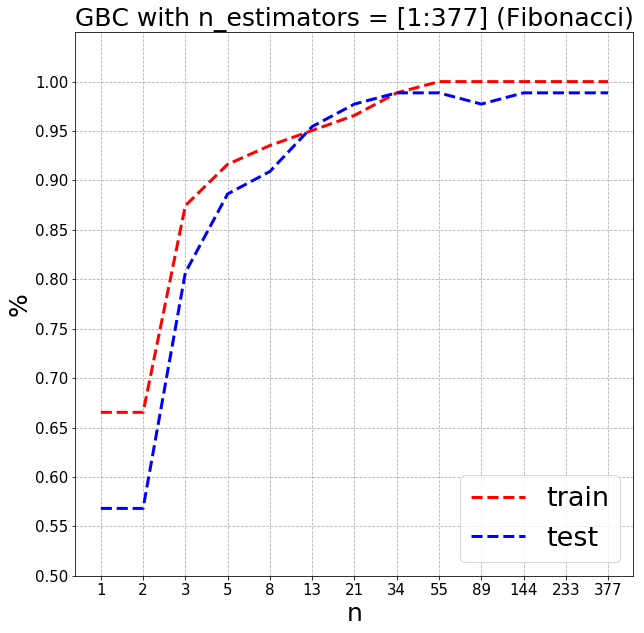

In [192]:
plt.figure(figsize=(10,10))

plt.plot(best_train['list'], 'r--', label='train', linewidth=3)
plt.plot(best_test['list'], 'b--', label='test', linewidth=3)

plt.legend(loc=4, prop={'size': 27})

plt.ylim(top=1.05, bottom=0.5)

plt.xticks(np.arange(len(n_est_list)), tuple(n_est_list), fontsize=15)
plt.yticks(np.arange(0.5, 1.05, 0.05), fontsize=15)

plt.title('GBC with n_estimators = [1:377] (Fibonacci)', fontsize=25)

plt.ylabel('%', fontsize=25)
plt.xlabel('n', fontsize=25)

plt.grid(linestyle='--')

## learning_rate loop 

In [194]:
l_rate_list = np.arange(0.05, 1, 0.05).round(decimals=2)

best_train = {}
best_test = {}

best_train['train_score'] = 0
best_test['test_score'] = 0

best_train['list'] = []
best_test['list'] = []

In [195]:
for l in l_rate_list:
    GBC_l = GradientBoostingClassifier(learning_rate=l)
    GBC_l.fit(X_train, y_train)
    
    train_score = GBC_l.score(X_train, y_train)
    test_score = GBC_l.score(X_test, y_test)
    
    if train_score > best_train['train_score']:
        best_train['train_score'] = train_score
        best_train['test_score'] = test_score
        best_train['l'] = l
        
    if test_score > best_test['test_score']:
        best_test['train_score'] = train_score
        best_test['test_score'] = test_score
        best_test['l'] = l
        
    best_train['list'].append(train_score)
    best_test['list'].append(test_score)

In [196]:
print('== == BEST TRAIN == ==')
print('l = \t\t{}'.format(best_train['l']))
print('train = \t{}'.format(best_train['test_score']))
print('test = \t\t{}'.format(best_train['test_score']))

print('== == BEST TEST == ==')
print('l = \t\t{}'.format(best_test['l']))
print('train = \t{}'.format(best_test['train_score']))
print('test = \t\t{}'.format(best_test['test_score']))

== == BEST TRAIN == ==
l = 		0.1
train = 	0.9772727272727273
test = 		0.9772727272727273
== == BEST TEST == ==
l = 		0.05
train = 	0.9961977186311787
test = 		0.9886363636363636


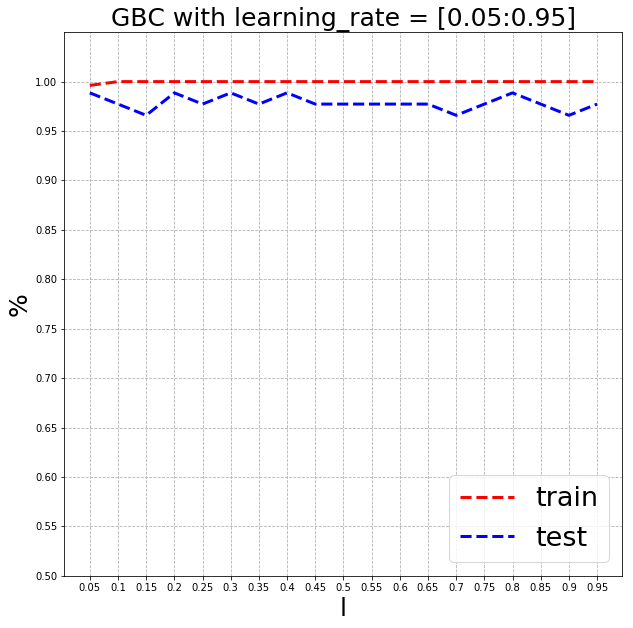

In [197]:
plt.figure(figsize=(10,10))

plt.plot(best_train['list'], 'r--', label='train', linewidth=3)
plt.plot(best_test['list'], 'b--', label='test', linewidth=3)

plt.legend(loc=4, prop={'size': 27})

plt.ylim(top=1.05, bottom=0.5)

plt.xticks(np.arange(len(l_rate_list)), tuple(l_rate_list), fontsize=10)
plt.yticks(np.arange(0.5, 1.05, 0.05), fontsize=10)

plt.title('GBC with learning_rate = [0.05:0.95]', fontsize=25)

plt.ylabel('%', fontsize=25)
plt.xlabel('l', fontsize=25)

plt.grid(linestyle='--')

## n_estimator loop [like in the first try] with loss: deviance or exponential

In [198]:
best_train = {}
best_test = {}

best_train['list_d'] = []
best_test['list_d'] = []

best_train['list_e'] = []
best_test['list_e'] = []

In [199]:
for n in n_est_list:
    GBC_n_d = GradientBoostingClassifier(n_estimators=n, loss='deviance')
    GBC_n_d.fit(X_train, y_train)
    
    GBC_n_e = GradientBoostingClassifier(n_estimators=n, loss='exponential')
    GBC_n_e.fit(X_train, y_train)
    
    train_score_d = GBC_n_d.score(X_train, y_train)
    test_score_d = GBC_n_d.score(X_test, y_test)
    
    train_score_e = GBC_n_e.score(X_train, y_train)
    test_score_e = GBC_n_e.score(X_test, y_test)
        
    best_train['list_d'].append(train_score_d)
    best_test['list_d'].append(test_score_d)

    best_train['list_e'].append(train_score_e)
    best_test['list_e'].append(test_score_e)

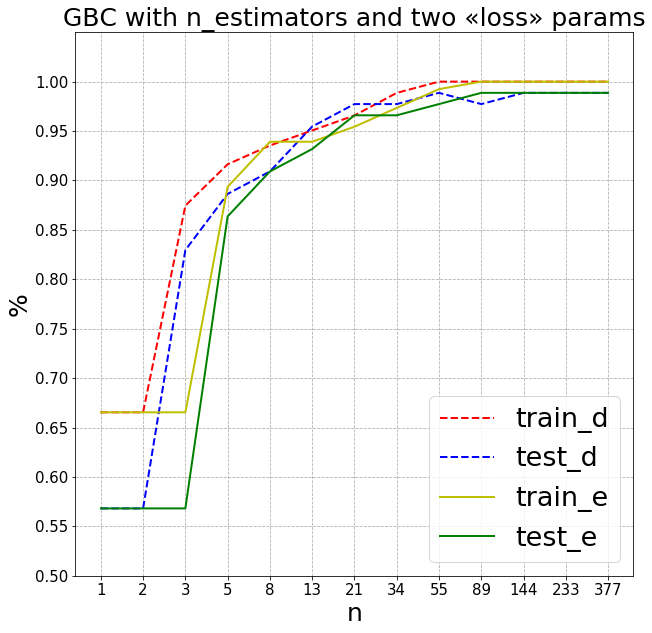

In [200]:
plt.figure(figsize=(10,10))

plt.plot(best_train['list_d'], 'r--', label='train_d', linewidth=2)
plt.plot(best_test['list_d'], 'b--', label='test_d', linewidth=2)

plt.plot(best_train['list_e'], 'y-', label='train_e', linewidth=2)
plt.plot(best_test['list_e'], 'g-', label='test_e', linewidth=2)

plt.legend(loc=4, prop={'size': 27})

plt.ylim(top=1.05, bottom=0.5)

plt.xticks(np.arange(len(n_est_list)), tuple(n_est_list), fontsize=15)
plt.yticks(np.arange(0.5, 1.05, 0.05), fontsize=15)

plt.title('GBC with n_estimators and two «loss» params', fontsize=25)

plt.ylabel('%', fontsize=25)
plt.xlabel('n', fontsize=25)

plt.grid(linestyle='--')

![GIF](giphy.gif)